In [7]:
import torch
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [108]:
marked = Image.open("screenshots/marked.png").crop((235,47,235+320,47+320))
marked = torch.from_numpy(np.array(marked))

sh_classical = Image.open("screenshots/sh_classical.png").crop((235,47,235+320,47+320))
sh_classical = torch.from_numpy(np.array(sh_classical))

super_sampled = Image.open("screenshots/super_sampled_scaled_down.png").crop((235,47,235+320,47+320))
super_sampled = torch.from_numpy(np.array(super_sampled))

octants_only = Image.open("screenshots/octants_only.png").crop((235,47,235+320,47+320))
octants_only = torch.from_numpy(np.array(octants_only))

In [28]:
mask = (marked[:,:,0] == 255) & (marked[:,:,1] == 0) & (marked[:,:,2] == 0)

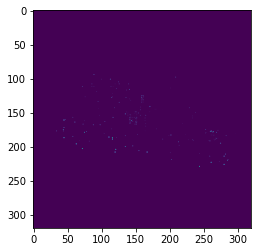

In [126]:
error = (sh_classical.float()/255. - super_sampled.float()/255.).norm(1,-1)
error[~mask]=0
plt.imshow(error)

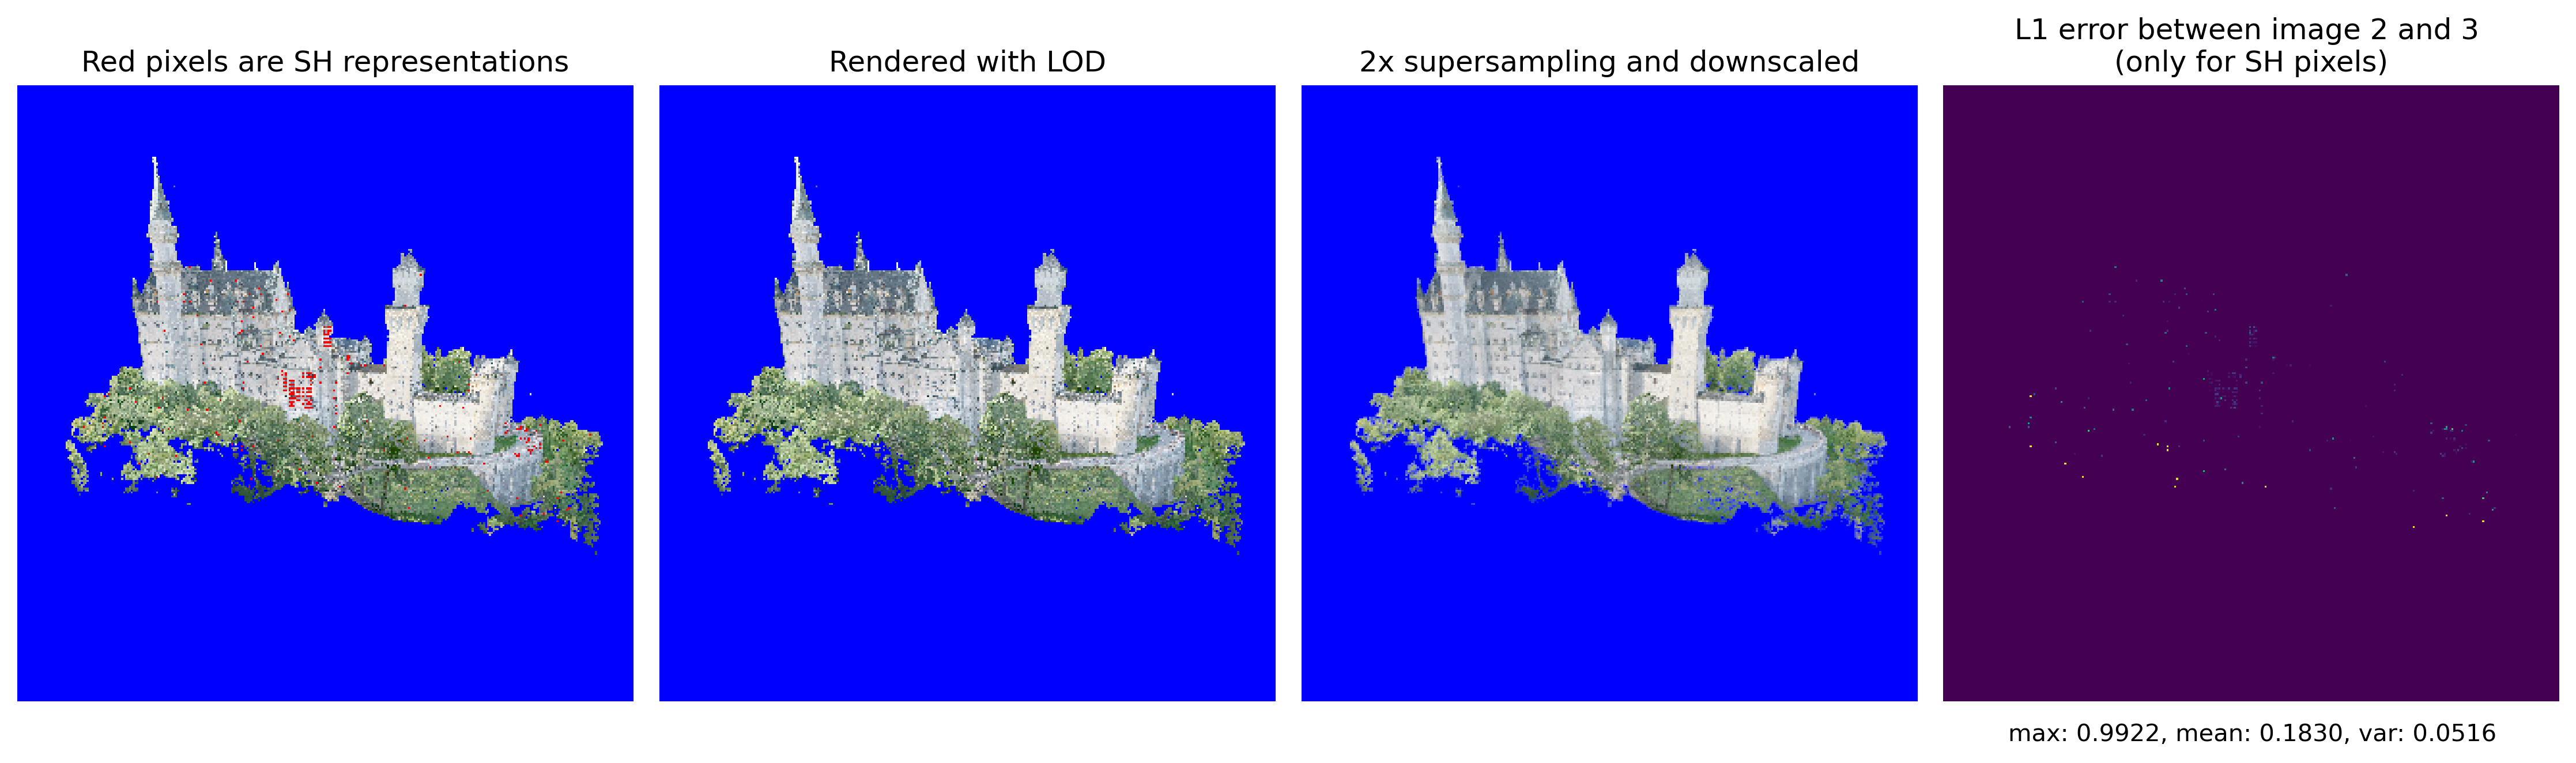

In [132]:
fig,axes = plt.subplots(1,4,figsize=(15,5),dpi=300,tight_layout=True)

axes[0].imshow(marked)
axes[0].set_title("Red pixels are SH representations")
axes[0].set_axis_off()

axes[1].imshow(sh_classical)
axes[1].set_title("Rendered with LOD")
axes[1].set_axis_off()

axes[2].imshow(super_sampled)
axes[2].set_title("2x supersampling and downscaled")
axes[2].set_axis_off()

axes[3].imshow(error)
axes[3].set_title("L1 error between image 2 and 3 \n(only for SH pixels)")
axes[3].set_axis_off()
axes[3].text(160,340,
    "max: {:.4f}, mean: {:.4f}, var: {:.4f}".format(error.max(),error[mask].mean(),error[mask].var())
    ,ha="center")

plt.savefig("screenshots/comparison.png")

In [128]:
"max: {:.4f}, mean: {:.4f}, var: {:.4f}".format(error.max(),error[mask].mean(),error[mask].var())

'max: 0.9922, mean: 0.1830, var: 0.0516'

(tensor(0.9922), tensor(0.2030), tensor(0.0507))

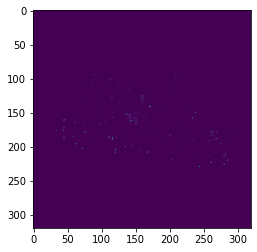

In [130]:
error_oc = (super_sampled.float()/255. - octants_only.float()/255.).norm(1,-1)
error_oc[~mask]=0
plt.imshow(error_oc)

error_oc.max(),error_oc[mask].mean(),error_oc[mask].var()

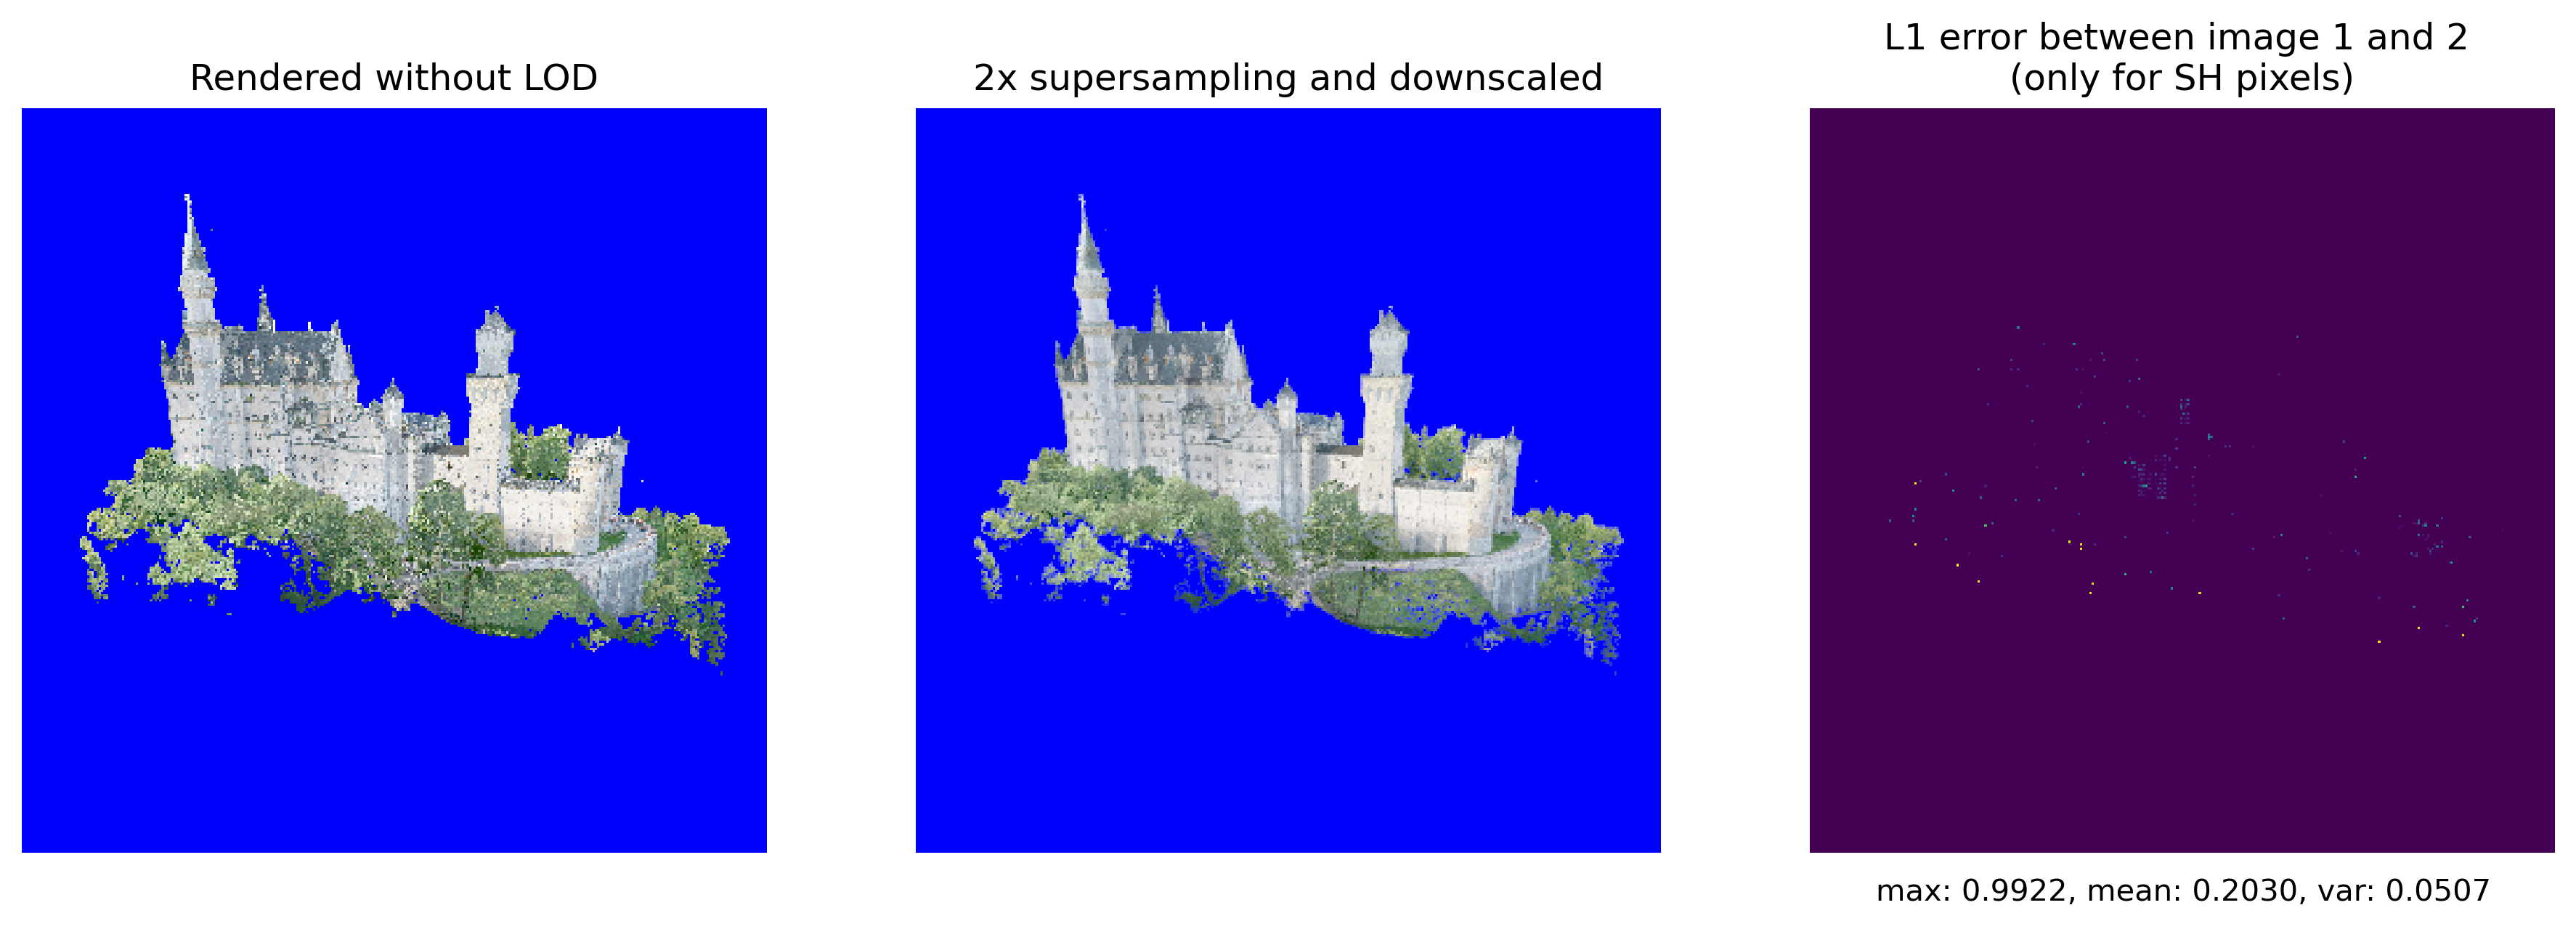

In [133]:
fig,axes = plt.subplots(1,3,figsize=(15,5),dpi=300)

axes[0].imshow(octants_only)
axes[0].set_title("Rendered without LOD")
axes[0].set_axis_off()

axes[1].imshow(super_sampled)
axes[1].set_title("2x supersampling and downscaled")
axes[1].set_axis_off()

axes[2].imshow(error_oc)
axes[2].set_title("L1 error between image 1 and 2 \n(only for SH pixels)")
axes[2].set_axis_off()
axes[2].text(160,340,
    "max: {:.4f}, mean: {:.4f}, var: {:.4f}".format(error_oc.max(),error_oc[mask].mean(),error_oc[mask].var())
    ,ha="center")

plt.savefig("screenshots/comparison_no_sh.png")

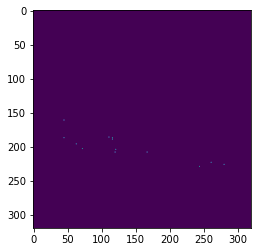

In [136]:
plt.imshow(error_oc>0.9)